![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
bikes["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

De los anteriores datos, es posible concluir que la variable *workingday* tiene dos categorías posibles en la que si toma el valor de uno, indica que es un dia diferente a fin de semana o festividad y cero de lo contrario. Así mismo, podemos observar que existen mayores observaciones con valores de uno, concluyendo que hay mayores observaciones con dias laborales, entendiendo que estos son los días en los cuales existe una mayor renta de ciclas.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.hour.describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [8]:
bikes["hour"].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

Por otra parte, la variable *hour* se compone de 24 valores diferentes que corresponde a las horas posibles del día, en la que se infiere que al haber una mayor media en algunas de las horas, es cuando mayor número de ciclas se renta, particularmente en las franjas horarias de 7 a.m. a 8 a.m. y de 11 a.m. a 6 p.m. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

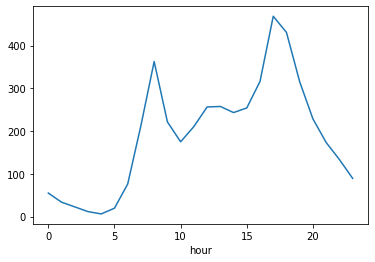

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

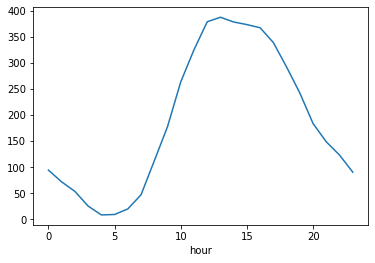

In [10]:
# Celda 2.2 - "workingday" = 0 escriba su código y hallazgos
bikes0 = bikes[bikes.workingday == 0]
bikes0.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

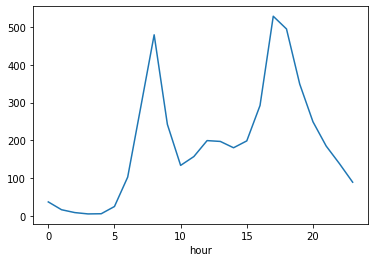

In [11]:
# Celda 2.3 - "workingday" = 1 escriba su código y hallazgos 
bikes1 = bikes[bikes.workingday == 1]
bikes1.groupby('hour').total.mean().plot()

De las anteriores gráficas es posible observar que para el caso en la que la variable *workingday* es igual a 1, es decir los días laborales, la hora de mayor número de renta de ciclas es a las 5 p.m. Tambien, existe un pico importante de renta a las 7 a.m. siendo estos los horarios más importantes para la renta, lo cual coincide con las horas en que las personas salen de su casa para el trabajo (7 a.m.) y se devuelven del trabajo para su casa (5 p.m.). 

Por otra parte, cuando la variable *workingday* toma el valor de 0, el comportamiento de la renta cambia considerablemente, observado que el horario en el cual se realiza un mayor número de rentas de ciclas es para el medio día.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
# Selección de variables predictoras
x = bikes.columns.drop(['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 
                        'windspeed', 'casual', 'registered', 'total'])
x_total = bikes[x]
x_total = x_total.reset_index(drop = True)

# Selección de la variable de interés
y_total = bikes.loc[:, bikes.columns == "total"]
y_total = y_total.reset_index(drop = True)
y_total = y_total['total'].astype(int)

In [13]:
# Entrenamiento del modelo con Regresión Lineal
regresion_lineal = LinearRegression().fit(x_total, y_total)

In [14]:
# Coeficientes del modelo
regresion_lineal.coef_

array([ 4.07248627, 10.49206282])

In [15]:
regresion_lineal.intercept_

67.70595026191623

De acuerdo a los coeficientes del anterior modelo, es posible concluir que:

* El coeficiente de la variable *workingday* es positivo: 
En la medida en que la variable *workingday* sea igual a 1, es decir indique que es un día laboral, el número de ciclas rentadas será aproximadamente 4. 

* El coeficiente de la variable *hour* es positivo:
Esto quiere decir que entre mayor sea la hora de la renta, mayor será el número de ciclas rentadas. 

La desventaja evidente en este tipo de modelo es que es muy rigido, esto quiere decir que en el caso de que la variable *workingday* sea cero, pronosticará que no habrá rentas y esto no es del todo cierto ya que como se observo anteriormente para estos casos se evidencia que si pueden haber rentas. Así mismo, el modelo sugiere que entre más tarde sea, le asignará un mayor número de rentas de ciclas lo cual distorciona el verdadero fenómeno, pues del análisis exploratorio se observó que tambien hay un flujo importante de rentas en el horario de las 7 a.m.

Es así que este no podría ser un buen modelo que se ajuste a la realidad de la situación, ya que es muy restrictivo y no captura todo el espectro de lo que ralmente sucede. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [16]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None # Nodos terminales o hojas
num_pct = 10 # Niveles del arbol
max_features = None # Número de nodos o splits
min_gain = 0.001 # Criterio de ganancia. Si al dividirse hay una mayor ganancia

In [17]:
# Definición de la función que calcula el gini index. Recuperado https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy
def gini(x):
    
    x = np.asarray(x)
    
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    
    # Gini coefficient
    g = 0.5 * rmad
    
    return g

In [18]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col <= split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [19]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(x_total, y_total, num_pct = 10):
    
    features = range(x_total.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(x_total.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct + 1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(x_total.iloc[:, j], y_total, split)
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [20]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(x_total, y_total, 5)
j, split, gain

(1, 4.0, 0.05463988729908803)

In [21]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = x_total.iloc[:, j] <= split

y_l = y_total.loc[filter_l]
y_r = y_total.loc[~filter_l]

In [22]:
y_total.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 2232, 8654)

In [23]:
y_total.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 26.273297491039425, 234.20776519528542)

In [24]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(x_total, y_total, level = 0, min_gain = 0.001, max_depth = None, num_pct = 10):
    
    # Si solo es una observación
    if x_total.shape[0] == 1:
        tree = dict(y_pred = y_total.iloc[:1].values[0], y_prob = 0.5, level = level, split = -1, n_samples = 1,
                    gain = 0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(x_total, y_total, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y_total.mean() >= 0.5) 
    y_prob = (y_total.sum() + 1.0) / (y_total.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred = y_pred, y_prob = y_prob, level = level, split = -1, n_samples = x_total.shape[0], 
                gain = gain)
    
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = x_total.iloc[:, j] < split
    X_l, y_l = x_total.loc[filter_l], y_total.loc[filter_l]
    X_r, y_r = x_total.loc[~filter_l], y_total.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    
    return tree

In [ ]:
# Aplicación de la función tree_grow
tree = tree_grow(x_total, y_total, level = 0, min_gain = 0.001, max_depth = 6, num_pct = 10)
tree

In [ ]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'
def tree_predict(x_total, tree, proba = False):
    
    predicted = np.ones(x_total.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (x_total.iloc[:, j] < split)
        X_l = x_total.loc[filter_l]
        X_r = x_total.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [ ]:
# Ejecución de función tree_predict
tree_predict(x_total, tree)

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del accuracy para cada valor de máxima profundidad (max_depth)
MSE = []
pd.DataFrame(MSE)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    
    # Definición del árbol de decisión usando DecisionTreeRegression de la libreria sklearn
    arbol_decision = DecisionTreeRegressor(criterion = 'friedman_mse',
                                           splitter = 'best',
                                           max_depth = depth,
                                           random_state = 0)
    arbol_decision.fit(x_total, y_total)
    y_pred = arbol_decision.predict(x_total)
    
    y_pred.shape
    MSE1 = np.average(np.square(y_pred - y_total))
    
    MSE.append(MSE1)

In [ ]:
# Gráfica max_depth versus MSE (error del modelo)
plt.plot(max_depth_range, MSE)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(MSE, max_depth_range))[::-1][0]

#### Desempeño Modelos de Regresión Lineal

In [ ]:
# Predicción de las observaciones del set de test para el modelo
y_pred = regresion_lineal.predict(x_total)
mse_LR = metrics.mean_squared_error(y_pred, y_total)
mse_LR

De acuerdo a los resultados del MSE del modelo Árbol de Decisión y el modelo de Regresión Lineal, es posible concluir que el modelo con menor error cuadrático es el del Árbol de Decisión.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis = 1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

### Árbol de decisión

* Accuracy

In [ ]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy').mean())

In [ ]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [ ]:
# max_depth = 2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)
clf.fit(X, y)

* F1 Score

In [ ]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv = 10, scoring = 'f1').mean())

In [ ]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [ ]:
# max_depth = 2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)
clf.fit(X, y)

### Regresión Logística

In [ ]:
# Entrenamiento del modelo con Regresión Lineal
regresion_logistica = LogisticRegression(random_state = 0).fit(X, y)
regresion_logistica.score(X, y)

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

#### 100 árboles de decisión donde max_depth = None

In [ ]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = None), n_estimators = 100).fit(X, y)

In [ ]:
# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
max_depth_none_vm = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

#### 100 árboles de decisión donde max_depth = 2

In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(X, y)

In [ ]:
# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
max_depth_2_vm = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

#### 100 regresiones logísticas

In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = LogisticRegression(random_state = 0), n_estimators = 100).fit(X, y)

In [ ]:
# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
logistic_regression_vm = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

#### 100 árboles de decisión donde max_depth = None

In [ ]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = None), n_estimators = 100).fit(X, y)

# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

In [ ]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(model.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], model.n_estimators))

for i in range(model.n_estimators):
    oob_sample = ~model.estimators_samples_[i]
    y_pred_ = model.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = model.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [ ]:
# Desempeño al hacer votación ponderada
max_depth_none_vp = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

#### 100 árboles de decisión donde max_depth = 2

In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(X, y)

# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

In [ ]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(model.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], model.n_estimators))

for i in range(model.n_estimators):
    oob_sample = ~model.estimators_samples_[i]
    y_pred_ = model.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = model.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [ ]:
# Desempeño al hacer votación ponderada
max_depth_2_vp = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

#### 100 regresiones logísticas

In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
model = BaggingClassifier(base_estimator = LogisticRegression(random_state = 0), n_estimators = 100).fit(X, y)

In [ ]:
# Predicción y desempeño al hacer votación mayoritaria
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

In [ ]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(model.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], model.n_estimators))

for i in range(model.n_estimators):
    oob_sample = ~model.estimators_samples_[i]
    y_pred_ = model.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = model.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [ ]:
# Desempeño al hacer votación ponderada
logistic_regression_vp = metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
#Celda 9
print('Votación Mayoritaria')
print('Con max_depth none =', max_depth_none_vm)
print('Con max_depth 2 =', max_depth_2_vm)
print('Con Regresión Logística =', logistic_regression_vm)
print('-------------------------------')
print('Votación Ponderada')
print('Con max_depth none =', max_depth_none_vp)
print('Con max_depth 2 =', max_depth_2_vp)
print('Con Regresión Logística =', logistic_regression_vp)

De acuerdo con los resultados de los modelos de ensamblajes por combinación de clasificadores, es posible concluir que el modelo con mejor desempeño y especioficamente con el parametro de profundidad *none* es el de *Votación Ponderada* con un *Acurracy* de 0.65 y un *F1* de 0.66. Esto se debe a que la *Votación Ponderada* busca un parametro de ponderación que le permita dar prioridad aquellos modelos que tienen mayor relevancia. En cambio la *Votación Mayoritaria* considera una imaportancia igualitaria para todos los modelos. 